In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kmapper as km
import pyballmapper as pbm
import statistics
import seaborn as sns
import networkx as nx
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib.colors import ListedColormap
from matplotlib import colormaps as cm

In [22]:
US_fulldataset=pd.read_csv('US results/Outputs/US_ball_results.csv')
ball_means=pd.read_csv('Outputs/US_ballmeans.csv')

## K-means

In [10]:
kmeans_data=US_fulldataset[['Nohighschool_25plus', 'Highschool_25plus',
       'Somedegree_25plus', 'Assocdegree_25plus', 'Degree_25plus', 'Under18',
       '18to24', '25to34', '35to49', '50to64', 'Over65', 'White',
       'Rural', 'manu_arg', 'Poverty', 'lessthan50K', '50to75k', '75to100k',
       'morethan100k', 'Adult obesity raw value',
       'Poor or fair health raw value', 'Unemployment raw value']]

### Elbow plot

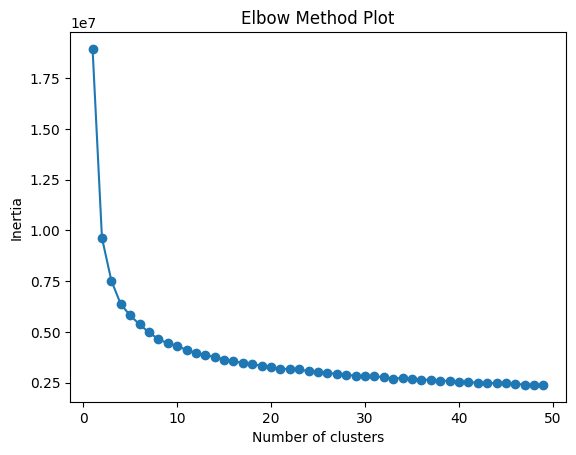

In [11]:
inertias = []

for i in range(1,50):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(kmeans_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,50), inertias, marker='o')
plt.title('Elbow Method Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('US results/Robustness/km_us_elbowplot.png')
plt.show()

### Silhouette score

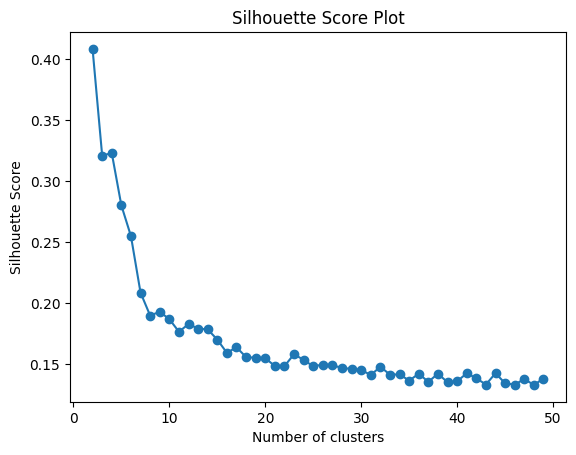

In [12]:
scores = []

for i in range(2,50):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_predict(kmeans_data)
    score=silhouette_score(kmeans_data, kmeans.labels_)
    scores.append(score)
    

plt.plot(range(2,50), scores, marker='o')
plt.title('Silhouette Score Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.savefig('US results/Robustness/km_us_silhouetteplot.png')
plt.show()

In [13]:
kmeans = KMeans(n_clusters=58, random_state=0, n_init="auto").fit(kmeans_data)

US_fulldataset['cluster']=kmeans.labels_

In [20]:
columns=['REPUBLICAN_2016','Nohighschool_25plus', 'Highschool_25plus',
       'Somedegree_25plus', 'Assocdegree_25plus', 'Degree_25plus', 'Under18',
       '18to24', '25to34', '35to49', '50to64', 'Over65', 'White',
       'Rural', 'manu_arg', 'Poverty', 'lessthan50K', '50to75k', '75to100k',
       'morethan100k', 'Adult obesity raw value',
       'Poor or fair health raw value', 'Unemployment raw value']
km_means=pd.DataFrame()
km_means['size']=US_fulldataset.groupby('cluster').size()
for col in columns:
    km_means[col]=US_fulldataset.groupby('cluster')[col].mean()

In [23]:
km_means['ctype']='kmeans'
ball_means['ctype']='TDABM'

In [24]:
clustm = pd.concat([km_means,ball_means])

In [25]:
clustm.columns

Index(['size', 'REPUBLICAN_2016', 'Nohighschool_25plus', 'Highschool_25plus',
       'Somedegree_25plus', 'Assocdegree_25plus', 'Degree_25plus', 'Under18',
       '18to24', '25to34', '35to49', '50to64', 'Over65', 'White', 'Rural',
       'manu_arg', 'Poverty', 'lessthan50K', '50to75k', '75to100k',
       'morethan100k', 'Adult obesity raw value',
       'Poor or fair health raw value', 'Unemployment raw value', 'ctype',
       'ball', 'REPUBLICAN_2012'],
      dtype='object')

In [26]:
clustm=clustm[['REPUBLICAN_2016','White','Degree_25plus','lessthan50K','Over65','manu_arg','ctype']]
clustm = clustm.reset_index(drop=True)

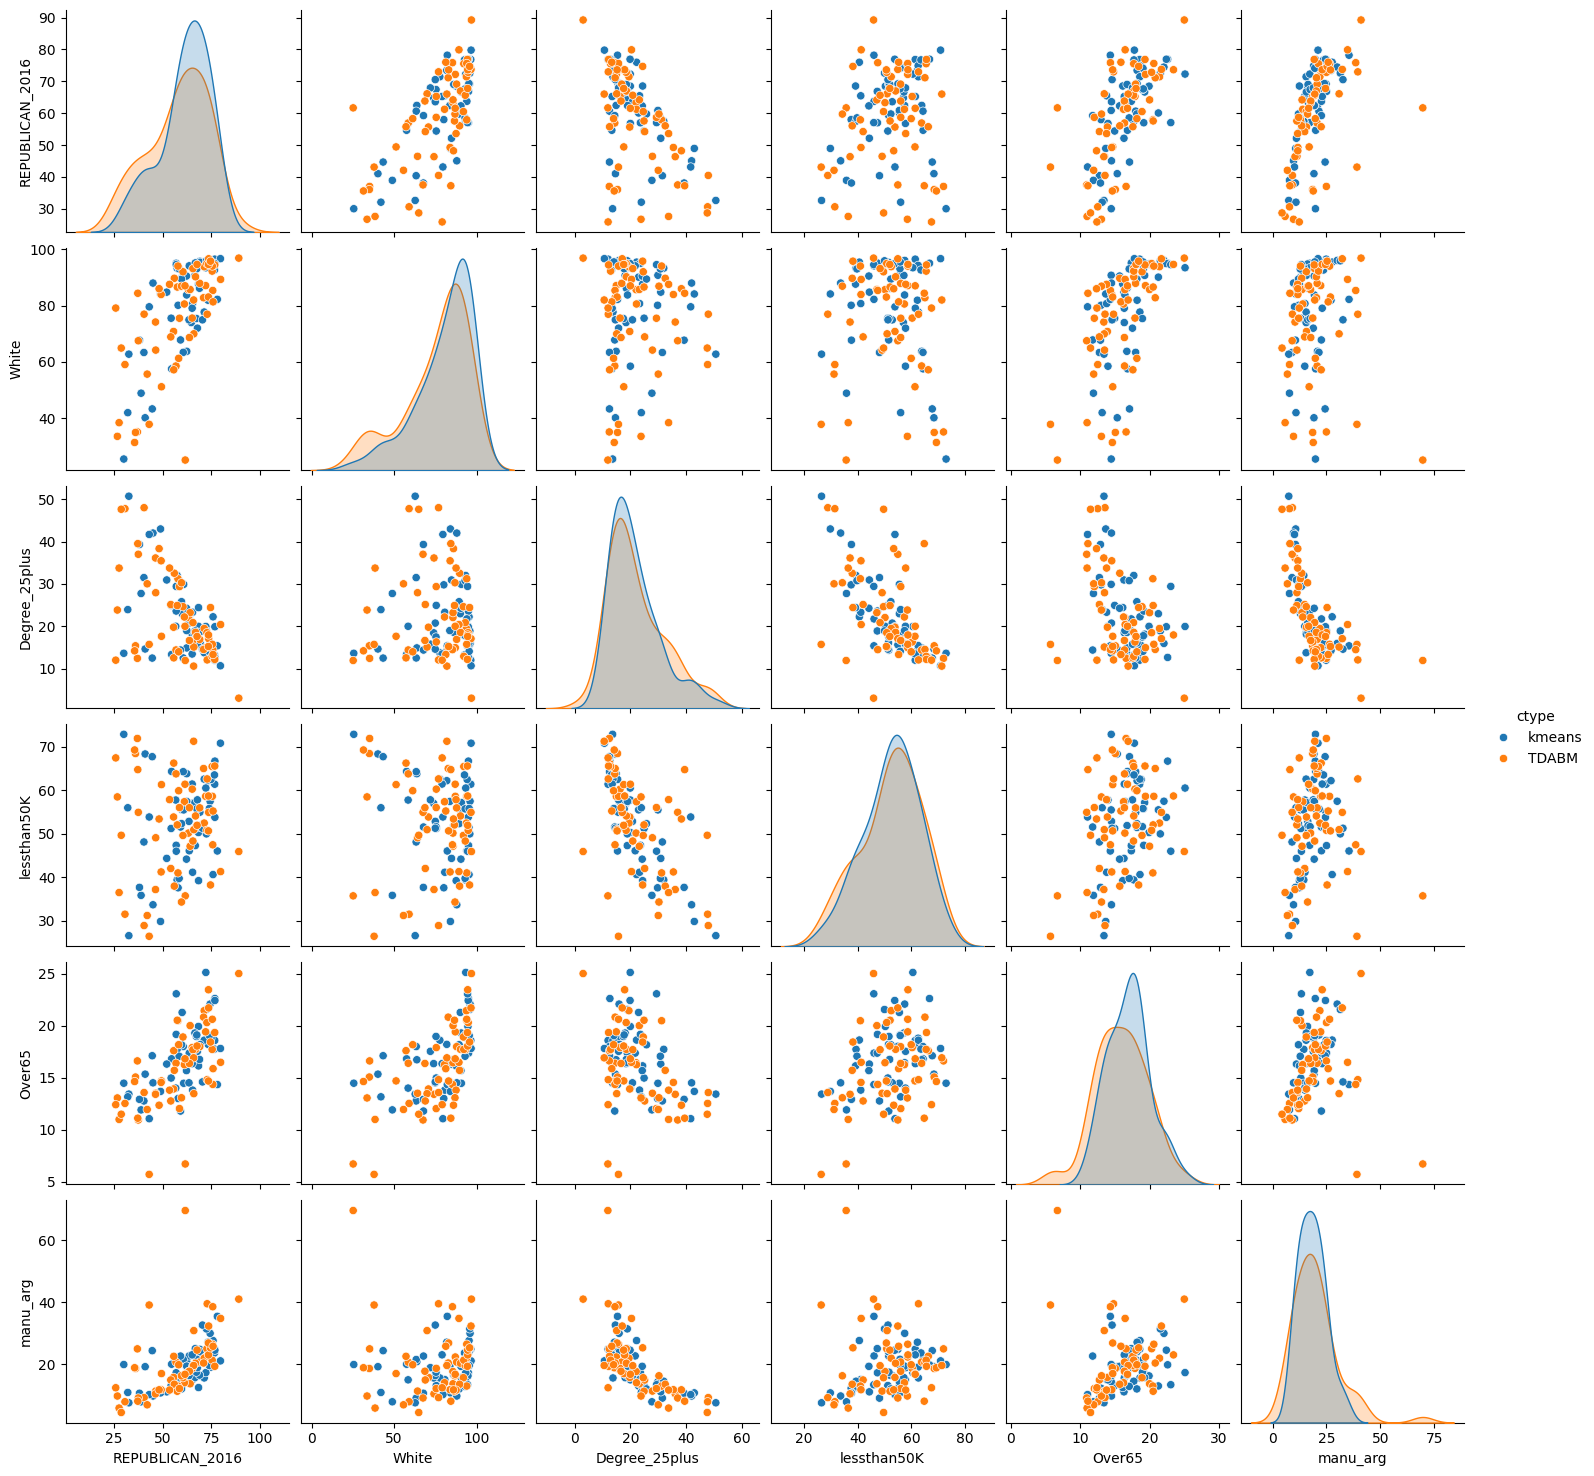

In [28]:
sns.pairplot(clustm,hue='ctype')
plt.savefig('US results/Robustness/kmeans_TDABM_pairplot_us.png')

## Different Epsilon

In [14]:
bmx1=US_fulldataset[['Nohighschool_25plus', 'Highschool_25plus',
       'Somedegree_25plus', 'Assocdegree_25plus', 'Degree_25plus', 'Under18',
       '18to24', '25to34', '35to49', '50to64', 'Over65', 'White',
       'Rural', 'manu_arg', 'Poverty', 'lessthan50K', '50to75k', '75to100k',
       'morethan100k', 'Adult obesity raw value',
       'Poor or fair health raw value', 'Unemployment raw value']]

## Epsilon = 31

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


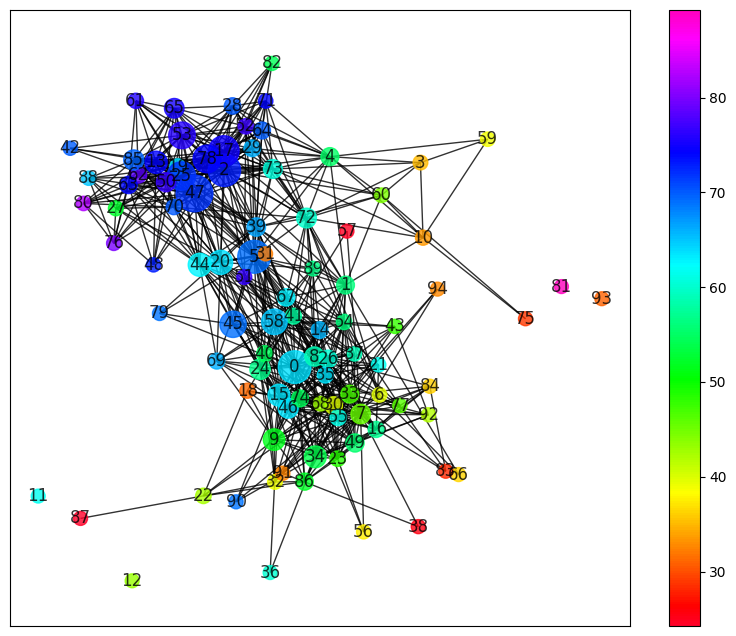

In [15]:
cdf = pd.DataFrame(US_fulldataset['REPUBLICAN_2016'])
bm1=pbm.BallMapper(X=bmx1, eps=31 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='REPUBLICAN_2016',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.5,seed=5))
plt.savefig('US results/Robustness/US_robustness_31.png')
plt.show()

## Epsilon = 33

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


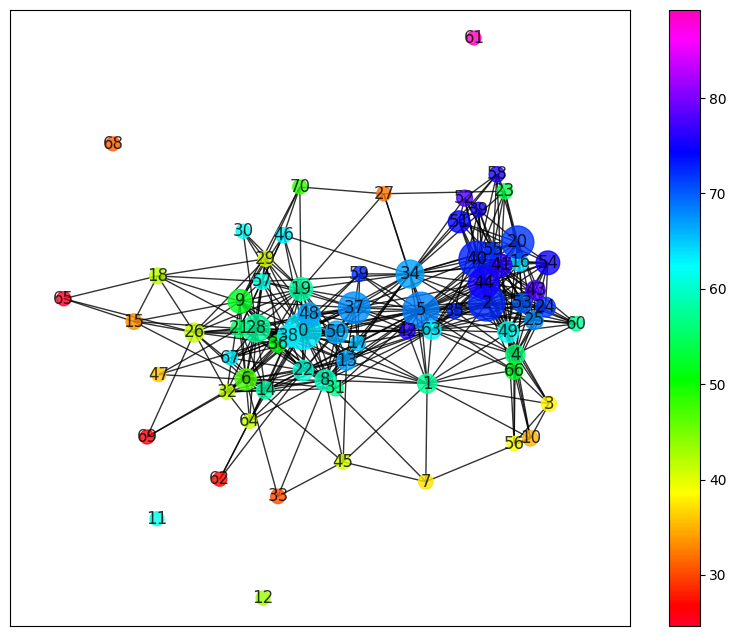

In [16]:
cdf = pd.DataFrame(US_fulldataset['REPUBLICAN_2016'])
bm1=pbm.BallMapper(X=bmx1, eps=33 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='REPUBLICAN_2016',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.5,seed=5))
plt.savefig('US results/Robustness/US_robustness_33.png')
plt.show()

## Epsilon = 37

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


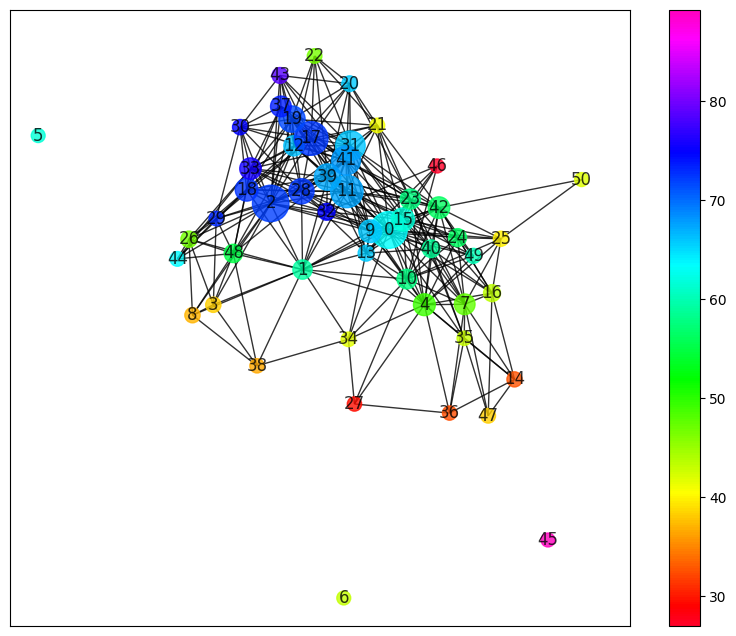

In [17]:
cdf = pd.DataFrame(US_fulldataset['REPUBLICAN_2016'])
bm1=pbm.BallMapper(X=bmx1, eps=37 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='REPUBLICAN_2016',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.5,seed=5))
plt.savefig('US results/Robustness/US_robustness_37.png')
plt.show()

## Epsilon = 39

/Users/elliebarranbeck/ERP clean/.venv/lib/python3.9/site-packages/pyballmapper/ballmapper.py:292: UserWarning: Warning........... order is not a list or numpy array, using default ordering
  warnings.warn(


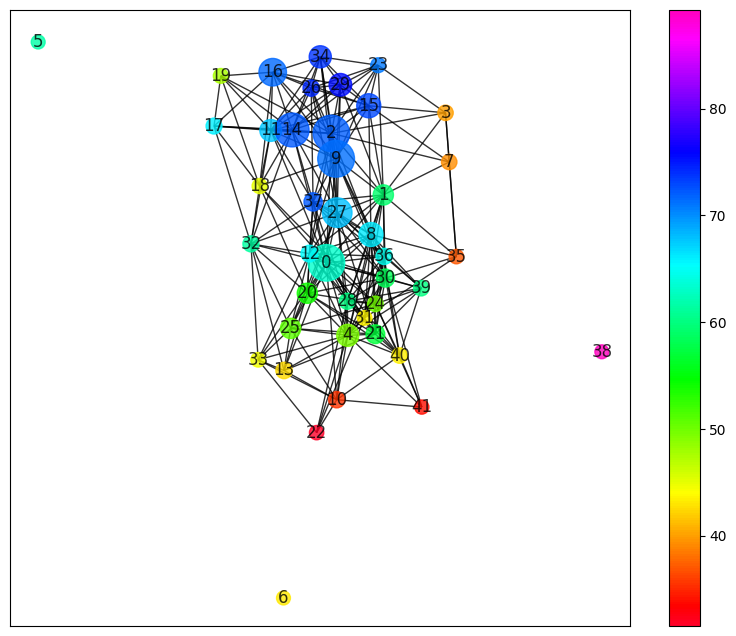

In [18]:
cdf = pd.DataFrame(US_fulldataset['REPUBLICAN_2016'])
bm1=pbm.BallMapper(X=bmx1, eps=39 ,coloring_df=cdf)
hsvp = cm.get_cmap("gist_rainbow")
plt.figure(figsize=(10, 8))
bm1.draw_networkx(coloring_variable='REPUBLICAN_2016',color_palette=hsvp, colorbar=True, pos=nx.spring_layout(bm1.Graph,k=0.5,seed=5))
plt.savefig('US results/Robustness/US_robustness_39.png')
plt.show()